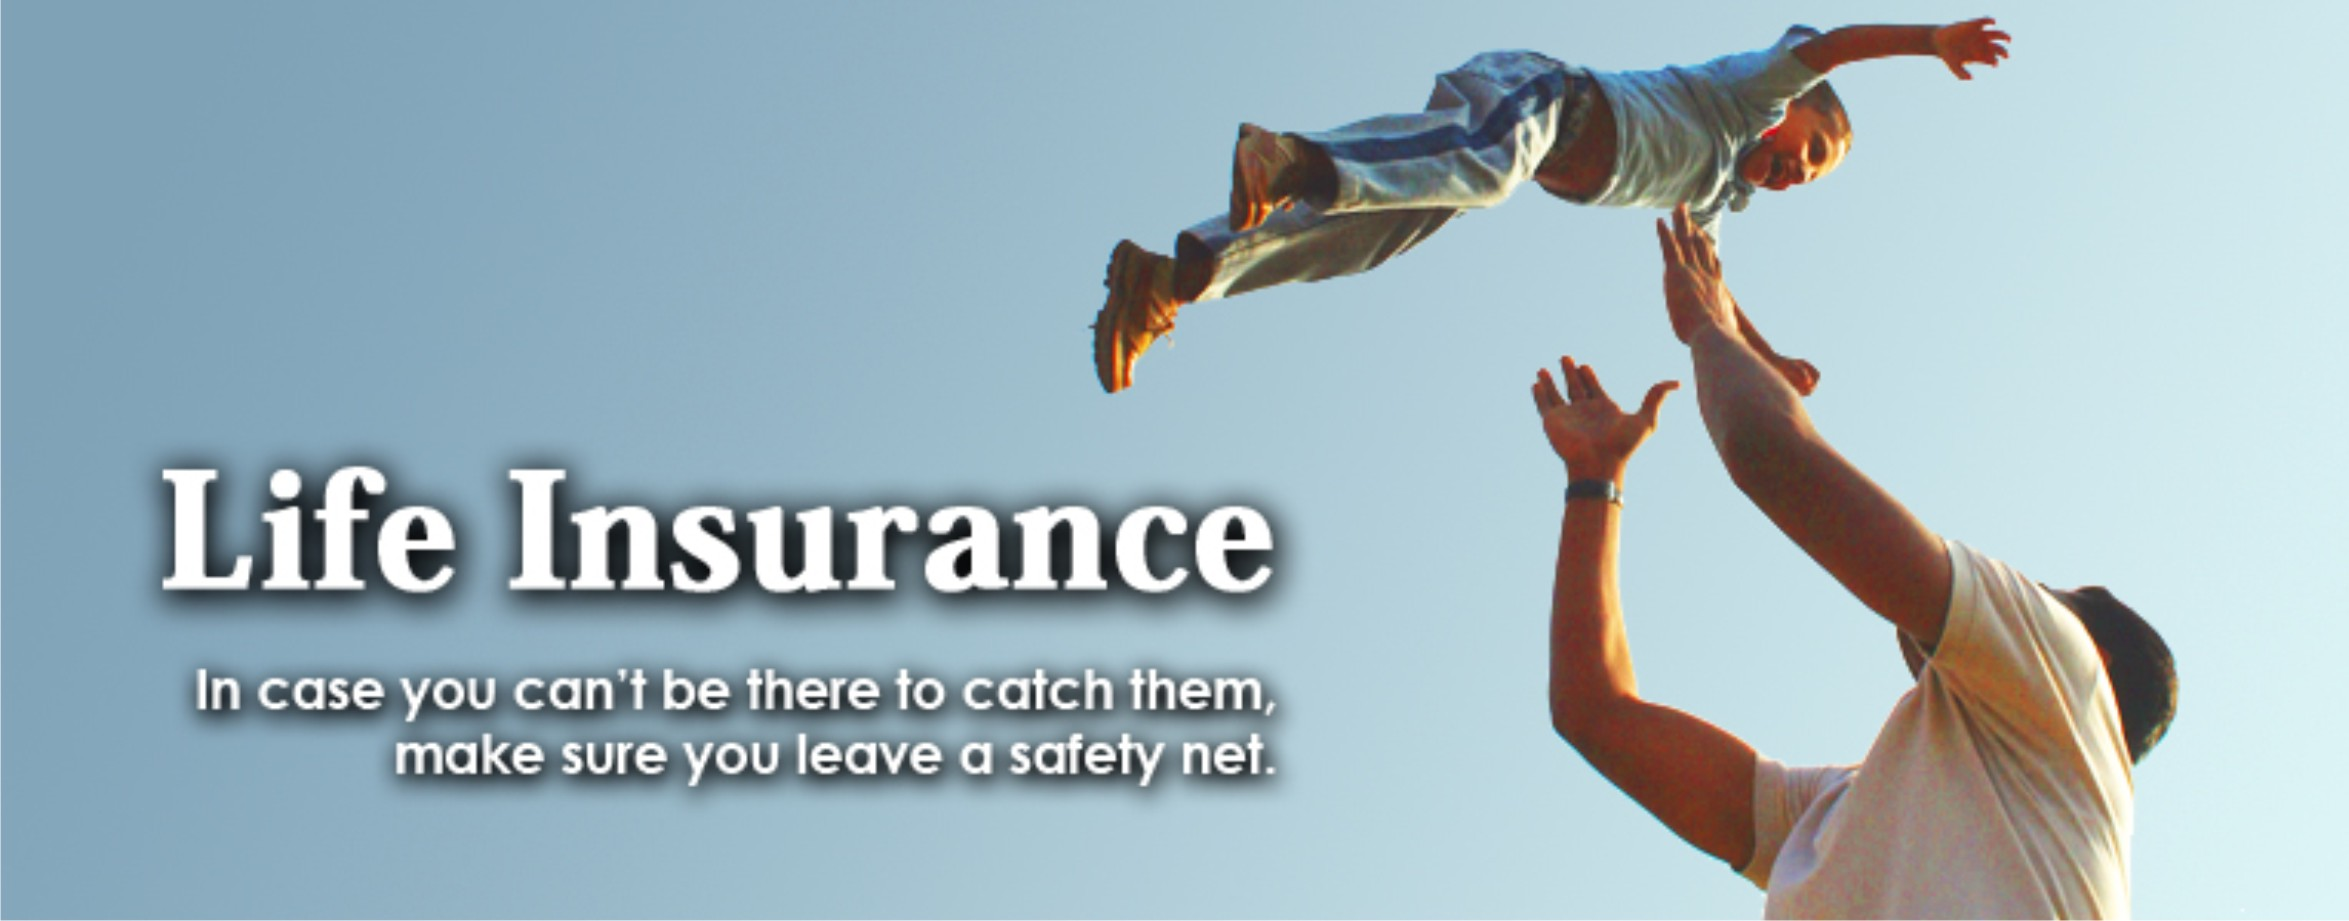

# Background:
- An insurance company offers life insurance to its customers. 
- It asks you for help to create a tool that would allow her to automatically know the risks linked to the opening of a new customer contract. 
- Target : A value of 1 indicates a low risk contract, a value of 8 a very risky contract

#### a) Exploratory Data Analysis(EDA)
    1) Analysis of the features
    2) Finding any relations or trends considering multiple features
#### b) Feature Engineering and Data Cleaning
    1) Add any few features
    2) Removing redundant features
    3) Converting features into suitable form for modeling
#### c) Predicting Modeling
    1) Running Basic Algorithms
    2) Cross Validation
    3) Ensembling
    4) Important Features Extraction

# **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# While on colab google
# data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/train.csv')
# data.info()

# Run in my own pc
data = pd.read_csv('./dataset/train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58881 entries, 0 to 58880
Columns: 129 entries, Product_Info_1 to Response
dtypes: float64(18), int64(107), object(4)
memory usage: 58.0+ MB


# **PART I - Exploratory Data Analysis**


1.   Analysis of the features
2.   Finding any relations of trends




In [5]:
print('Dataset shape:', data.shape)

Dataset shape: (58881, 129)


### Target variable

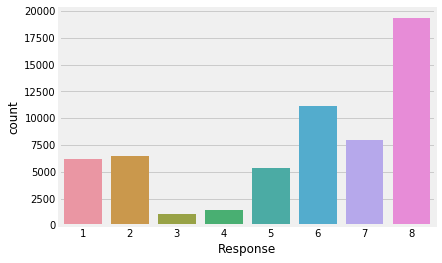

In [6]:
sns.countplot('Response', data=data)

###  Seems like we have a class unbalanced problem

In [7]:
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,A8,26,0.230769,2,3,1,0.492537,0.563636,0.225941,...,0,0,0,0,0,0,0,0,0,7
1,1,D2,26,1.000000,3,3,1,0.671642,0.781818,0.326360,...,0,0,0,0,0,0,0,0,0,6
2,1,D2,26,0.230769,2,3,1,0.626866,0.745455,0.393305,...,0,0,0,0,0,0,0,0,0,1
3,1,D4,26,0.230769,2,3,1,0.268657,0.690909,0.246862,...,0,0,0,0,0,0,0,0,0,4
4,1,E1,10,0.230769,2,3,1,0.641791,0.581818,0.466527,...,0,0,1,0,0,0,1,0,0,2


In [8]:
data.dtypes.value_counts()

int64      107
float64     18
object       4
dtype: int64

In [9]:
print('-----Dataset information-----\n')
# Get the columns with missing units
total_num = data.shape[0]
nan_counts = data.notnull().sum()[data.notnull().sum() != data.shape[0]].sort_values(ascending=False)
nan_num = nan_counts.shape[0]
print("Information about the columns have empty units \n (Show in possibility that have empty-units %):")
cols_with_nan = (total_num - nan_counts)  / total_num * 100
print(cols_with_nan)

-----Dataset information-----

Information about the columns have empty units 
 (Show in possibility that have empty-units %):
Employment_Info_1       0.032268
Employment_Info_4      11.407755
Medical_History_1      14.960683
Employment_Info_6      18.262258
Family_Hist_4          32.317726
Insurance_History_5    42.764219
Family_Hist_2          48.270240
Family_Hist_3          57.662064
Family_Hist_5          70.399620
InsuredInfo_9          74.940983
Medical_History_15     75.097230
InsuredInfo_8          87.919702
Medical_History_24     93.593859
Medical_History_32     98.131825
Medical_History_10     99.064214
dtype: float64


In [10]:
# Build a list to save all the column's names to be deleted
# Here We drop those columns with more than 50% data missing
cols_2_del = []
cols_2_del += cols_with_nan[cols_with_nan > 50].index.to_list()

### Analysis of the columns with meaning columns name or value


*   Ins_Age
*   Wt
*   Ht
*   BMI
*   InsuredInfo_7 -> ['Female', 'Male']
*   InsuredInfo_8 -> Race info
*   InsuredInfo_9 -> Religion info

    Here the 'InsuredInfo_8' and 'InsuredInfo_9' columns are dropped by the step before, so we skip them

## InsuredInfo_7 <=> Gender 

In [11]:
# Notice that column 'InsuredInfo_7' is like the Gender information
# So, we consider these data may be about people information
print(data['InsuredInfo_7'].unique())

['Female' 'Male']


In [12]:
# Convert column name to a meaningful string
data.rename(columns={"InsuredInfo_7":"Gender"}, inplace=True)

Male      33873
Female    25008
Name: Gender, dtype: int64


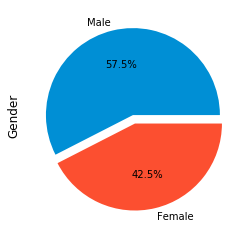

In [13]:
print(data['Gender'].value_counts())
data['Gender'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%')

## Will Gender param affect the Response ??

Firstly, we take a look at the distribution of the Response **[Target]**

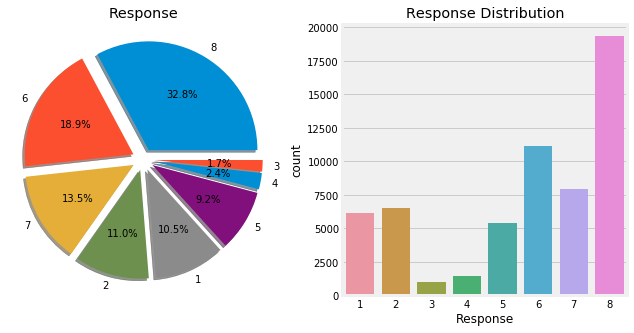

In [14]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

data['Response'].value_counts().plot.pie(explode=[0.1]*8, autopct='%1.1f%%', ax=ax[0],
                                        shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')

sns.countplot('Response', data=data, ax=ax[1])
ax[1].set_title('Response Distribution')
plt.show()

In [15]:
pd.crosstab(data.Response, data.Gender).style.background_gradient(cmap='summer_r')

Gender,Female,Male
Response,,
1,2498,3660
2,2592,3903
3,426,583
4,599,821
5,2254,3136
6,3136,8000
7,2950,4996
8,10553,8774


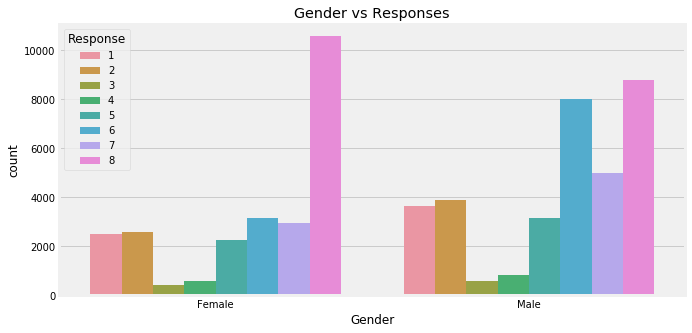

In [16]:
plt.figure(figsize=(10,5))
sns.countplot('Gender', hue='Response', data=data)
plt.title('Gender vs Responses')
plt.show()

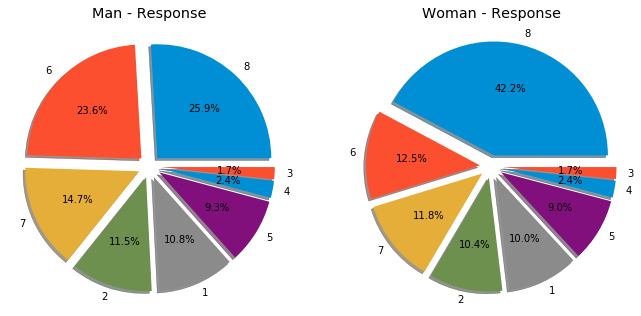

In [17]:
f, ax = plt.subplots(1, 2, figsize=(10, 8))

data[data['Gender']=='Male']['Response'].value_counts().plot.pie(explode=[0.1]*8, autopct='%1.1f%%', ax=ax[0],
                                        shadow=True)
ax[0].set_title('Man - Response')
ax[0].set_ylabel('')

data[data['Gender']=='Female']['Response'].value_counts().plot.pie(explode=[0.1]*8, autopct='%1.1f%%', ax=ax[1],
                                        shadow=True)
ax[1].set_title('Woman - Response')
ax[1].set_ylabel('')


plt.show()

- The main difference between two distribution is located at response 6 and 8.

### Ins_Age, Ht, Wt, BMI

#### Let's visualize the Numerical Attributes

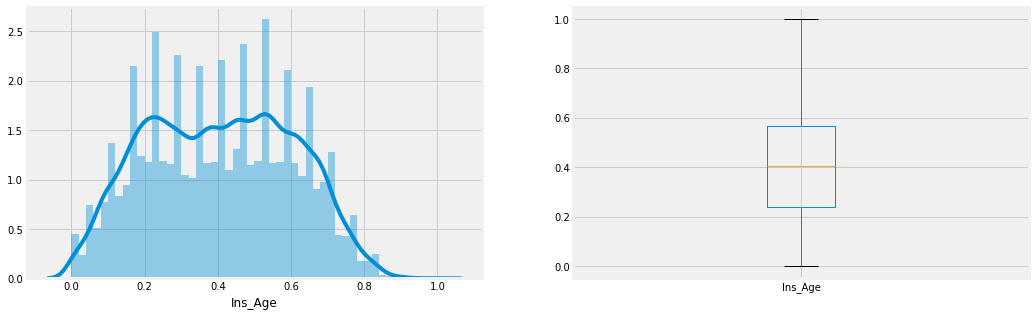

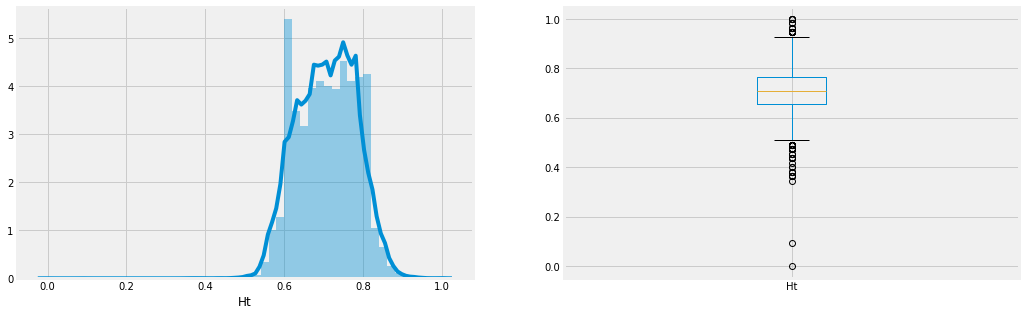

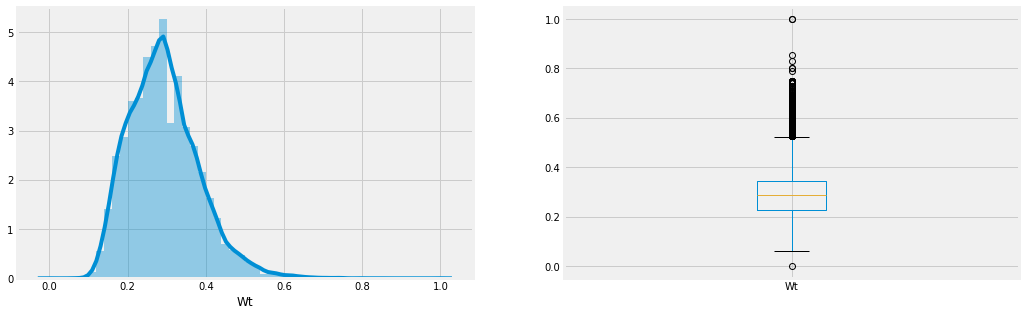

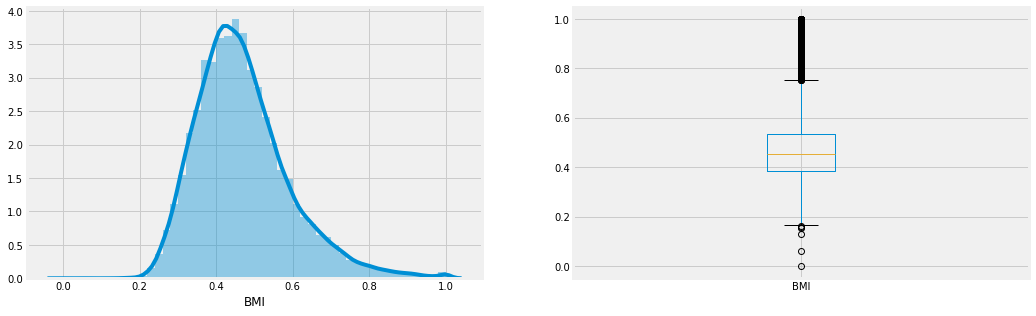

In [18]:
cols = ['Ins_Age', 'Ht', 'Wt', 'BMI']

for col in cols:    
    plt.figure(1)
    plt.subplot(121)
    sns.distplot(data[col])

    plt.subplot(122)
    data[col].plot.box(figsize=(16,5))

    plt.show()

### Age

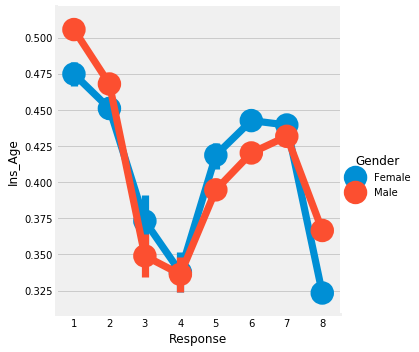

In [19]:
sns.factorplot(data=data, y='Ins_Age', x='Response', hue='Gender')

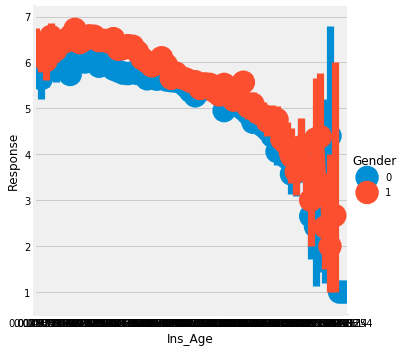

In [35]:
sns.factorplot(data=data, y='Response', x='Ins_Age', hue='Gender')

### Ht

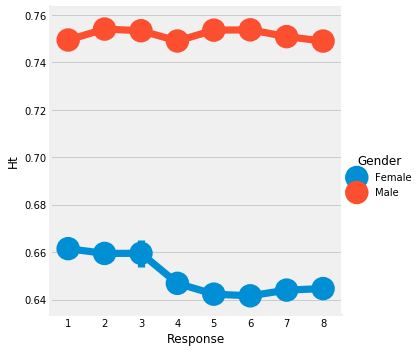

In [20]:
sns.factorplot(data=data, y='Ht', x='Response', hue='Gender')

### Wt

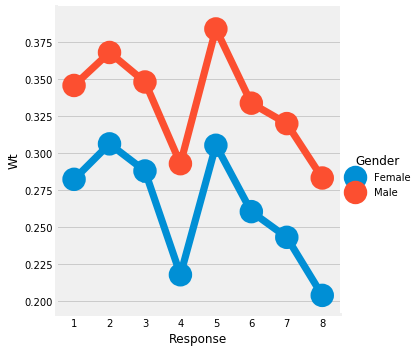

In [21]:
sns.factorplot(data=data, y='Wt', x='Response', hue='Gender')

### BMI

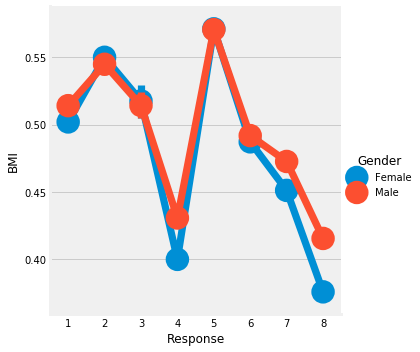

In [22]:
sns.factorplot(data=data, y='BMI', x='Response', hue='Gender')

<img src="https://www.healthandcare.co.uk/user/products/large/bmi-explanation.jpg" width="340" style="float:left;">

In [23]:
variance_low = data.var().sort_values(ascending=False)[-26:]
print('Columns with Variance lower than 0.01:')
print(variance_low)

Columns with Variance lower than 0.01:
Medical_Keyword_41     0.009920
Medical_Keyword_12     0.009887
Medical_Keyword_19     0.009204
Medical_Keyword_17     0.009104
Medical_History_11     0.009099
Medical_Keyword_2      0.008887
Medical_Keyword_5      0.008537
Medical_Keyword_46     0.008403
Medical_Keyword_20     0.008019
Wt                     0.007923
Medical_Keyword_14     0.007785
Medical_Keyword_44     0.007467
Medical_Keyword_18     0.007417
Medical_History_5      0.007401
InsuredInfo_2          0.007400
Medical_Keyword_35     0.006898
Product_Info_5         0.006898
Medical_Keyword_38     0.006814
Employment_Info_1      0.006803
Medical_Keyword_9      0.006580
Medical_Keyword_13     0.005892
Ht                     0.005513
Medical_History_38     0.004817
Medical_History_35     0.004106
Employment_Info_4      0.001083
Insurance_History_5    0.000054
dtype: float64


In [24]:
# Columns with low variance and contains less than 2/3 types of values
cols_low_var = []
for index in variance_low.index:
    if(data[index].unique().shape[0] < 4):
        cols_low_var += [index]

cols_2_del += cols_low_var

# **PART II - Feature Engineering and Data Cleaning**


1.   Add any few features[TBD]
2.   Removing redundant features
3.   Converting features into suitable form for modeling

## Resampling

- A widely adopted technique for dealing with highly unbalanced datasets is called resampling. 
    * It consists of **removing samples from the majority class** (under-sampling) 
    * **Adding more examples from the minority class** (over-sampling).

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

<div align='left'><font size='4' color=' #6c3483'>Oversample minority class </font></div>

In [0]:
# from sklearn.utils import resample
# # From the figure before we know the majority class is Response 8
# dict_each_label = {}
# for label in data['Response'].unique():
#     dict_each_label[label] = data[data['Response']==label]

# # upsample minority
# for i in range(1, 8):
#     dict_each_label[i] = resample(dict_each_label[i],
#                           replace=True, # sample with replacement
#                           n_samples=dict_each_label[8].shape[0], # match number in majority class
#                           random_state=27) # reproducible results
# data = pd.concat(list(dict_each_label.values()))

## Age_band

In [25]:
data['Age_band']=0
data.loc[data['Ins_Age']<=0.2,'Age_band']=0
data.loc[(data['Ins_Age']>0.2)&(data['Ins_Age']<=0.4),'Age_band']=1
data.loc[(data['Ins_Age']>0.4)&(data['Ins_Age']<=0.6),'Age_band']=2
data.loc[(data['Ins_Age']>0.6)&(data['Ins_Age']<=0.8),'Age_band']=3
data.loc[data['Ins_Age']>0.8,'Age_band']=4

In [26]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
2,19328
1,17481
0,10893
3,10565
4,614


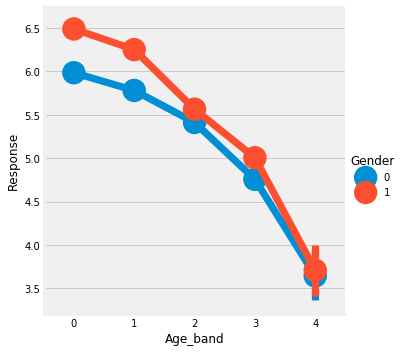

In [37]:
sns.factorplot(data=data, y='Response', x='Age_band', hue='Gender')

## Ht_band

In [27]:
data['Ht_band']=0
data.loc[data['Ht']<=0.2,'Ht_band']=0
data.loc[(data['Ht']>0.2)&(data['Ht']<=0.4),'Ht_band']=1
data.loc[(data['Ht']>0.4)&(data['Ht']<=0.6),'Ht_band']=2
data.loc[(data['Ht']>0.6)&(data['Ht']<=0.8),'Ht_band']=3
data.loc[data['Ht']>0.8,'Ht_band']=4

In [28]:
data['Ht_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Ht_band
3,47827
2,6289
4,4754
1,9
0,2


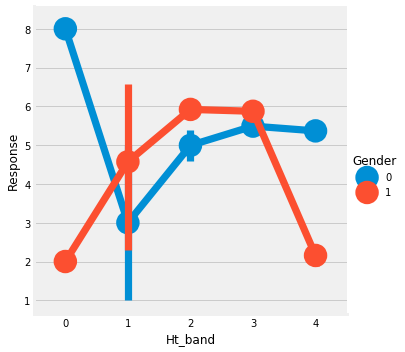

In [38]:
sns.factorplot(data=data, y='Response', x='Ht_band', hue='Gender')

## Wt_band

In [29]:
data['Wt_band']=0
data.loc[data['Wt']<=0.2,'Wt_band']=0
data.loc[(data['Wt']>0.2)&(data['Wt']<=0.4),'Wt_band']=1
data.loc[(data['Wt']>0.4)&(data['Wt']<=0.6),'Wt_band']=2
data.loc[(data['Wt']>0.6)&(data['Wt']<=0.8),'Wt_band']=3
data.loc[data['Wt']>0.8,'Wt_band']=4

In [30]:
data['Wt_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Wt_band
1,43448
0,8764
2,6429
3,234
4,6


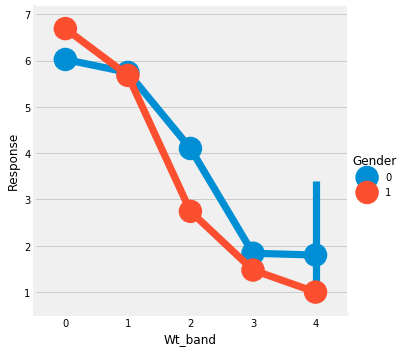

In [39]:
sns.factorplot(data=data, y='Response', x='Wt_band', hue='Gender')

## BMI_band

In [31]:
data['BMI_band']=0
data.loc[data['BMI']<=0.2,'BMI_band']=0
data.loc[(data['BMI']>0.2)&(data['BMI']<=0.4),'BMI_band']=1
data.loc[(data['BMI']>0.4)&(data['BMI']<=0.6),'BMI_band']=2
data.loc[(data['BMI']>0.6)&(data['BMI']<=0.8),'BMI_band']=3
data.loc[data['BMI']>0.8,'BMI_band']=4

In [32]:
data['BMI_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,BMI_band
2,33329
1,17783
3,6701
4,1043
0,25


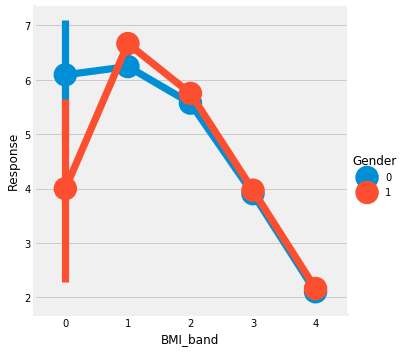

In [40]:
sns.factorplot(data=data, y='Response', x='BMI_band', hue='Gender')

<img src="https://www.healthandcare.co.uk/user/products/large/bmi-explanation.jpg" width="340" style="float:left;">

In [33]:
cols_original = ['Ins_Age', 'Ht', 'Wt', 'BMI']

cols_2_del += cols_original

In [34]:
# Gender converted to [0, 1]
data['Gender'].replace(['Male','Female'],[0,1],inplace=True)
# Product_Info_2 converted to 0~18
num_proInfo2 = data['Product_Info_2'].unique().shape[0]
data['Product_Info_2'].replace(data['Product_Info_2'].unique(),np.arange(num_proInfo2), inplace=True)

### 1st data cleansing

In [0]:
# Clean data
data = data.drop(cols_2_del, axis=1)

In [36]:
# Get the columns with missing units
total_num = data.shape[0]
nan_counts = data.notnull().sum()[data.notnull().sum() != 58881].sort_values(ascending=False)
nan_num = nan_counts.shape[0]
print("Information about the columns have empty units \n (Show in possibility that have empty-units %):")
cols_with_nan = (total_num - nan_counts)  / total_num * 100
print(cols_with_nan)

Information about the columns have empty units 
 (Show in possibility that have empty-units %):
Employment_Info_1       0.032268
Employment_Info_4      11.407755
Medical_History_1      14.960683
Employment_Info_6      18.262258
Family_Hist_4          32.317726
Insurance_History_5    42.764219
Family_Hist_2          48.270240
dtype: float64


In [0]:
for index in cols_with_nan.index:
    mean = data[index].mean()
    data[index] = data[index].fillna(mean)

In [39]:
data.notnull().sum()[data.notnull().sum() != 58881]

Series([], dtype: int64)

### Dataset -> StandardScaler

In [0]:
std_scaler = StandardScaler()

In [0]:
cols_2_scaler = []
for col in data.drop('Response', axis=1).columns:
    if(data[col].max() > 1):
        cols_2_scaler += [col]

In [0]:
scaled_data = data.copy()

In [43]:
features_2_scaler = scaled_data[cols_2_scaler]
features_2_scaler = std_scaler.fit_transform(features_2_scaler.values)
scaled_data[cols_2_scaler] = features_2_scaler
scaled_data

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_6,Product_Info_7,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,Gender,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_12,Medical_History_13,Medical_History_14,...,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_45,Medical_Keyword_47,Medical_Keyword_48,Response,Age_band,Ht_band,Wt_band,BMI_band
0,-0.164753,-1.292886,0.312443,0.230769,0.441665,-0.149456,0.0244,0.084692,-0.420863,0.0,-0.408317,0.050000,1.892875,-1.060172,0.363259,-0.117511,-0.140322,1,0.612203,-0.169146,-1.159698,1.101158,0.001733,1.130583,-0.063621,1.139484,0.649408,0.681159,0.492958,-0.662156,-0.795028,-0.337092,0.726027,0.241527,-0.071024,-0.151201,0.546231,-0.245031,0.361924,0.159083,...,0.128571,1.456355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0.457473,-2.246675,0.060007,0.225352
1,-0.164753,-1.044617,0.312443,1.000000,0.441665,-0.149456,0.5000,-1.334818,-0.420863,0.5,-0.408317,1.000000,-0.500442,0.809515,0.363259,-0.117511,-0.140322,0,0.612203,-0.169146,0.862309,-1.013561,0.006667,-0.928809,1.260539,-0.822729,-1.419625,0.474666,0.444972,-0.329841,-0.520715,-0.337092,-1.377359,0.241527,-0.071024,-0.151201,-1.829323,4.078520,0.361924,0.159083,...,0.128571,-0.686659,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1.437906,0.061103,0.060007,0.225352
2,-0.164753,-1.044617,0.312443,0.230769,0.441665,-0.149456,0.0400,0.084692,-0.420863,0.0,-0.408317,0.600000,-0.500442,-0.686235,0.363259,-0.117511,-0.140322,0,-1.633445,5.912982,0.862309,-1.013561,0.000833,-0.928809,-1.387780,-0.822729,0.649408,0.474666,0.444972,-0.412920,-1.405235,-0.337092,-1.377359,0.241527,-0.071024,-0.151201,0.546231,-0.245031,0.361924,0.159083,...,0.128571,1.456355,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1.437906,0.061103,0.060007,0.225352
3,-0.164753,-0.796347,0.312443,0.230769,0.441665,-0.149456,0.0300,0.084692,-0.420863,0.0,-0.408317,0.000000,-0.500442,0.061640,-2.752859,-0.117511,-0.140322,1,0.612203,-0.169146,-1.159698,1.101158,0.001733,1.130583,-0.063621,1.139484,-1.419625,0.536232,0.478873,0.334789,0.039107,-0.337092,0.726027,0.241527,-0.071024,-0.151201,0.546231,-0.245031,0.361924,0.159083,...,0.128571,-0.686659,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,-0.522961,0.061103,0.060007,0.225352
4,-0.164753,-0.548077,-2.841467,0.230769,0.441665,-0.149456,0.0280,0.084692,-0.420863,0.0,2.449077,1.000000,-0.500442,0.809515,0.363259,-0.117511,-0.140322,1,0.612203,-0.169146,0.862309,-1.013561,0.000039,-0.928809,1.260539,-0.822729,-1.419625,0.474666,0.444972,-0.579077,-0.795028,2.962162,0.726027,0.241527,5.729234,-3.584631,0.546231,-0.245031,-2.763237,-4.898682,...,0.128571,1.456355,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1.437906,-2.246675,1.970909,3.159013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [44]:
del data
gc.collect()

8325

In [45]:
print("Feature with correlation < 0.01 with response:")
corr_low = scaled_data.corr()['Response'][scaled_data.corr()['Response'].abs()<0.01].abs()
print(corr_low)

Feature with correlation < 0.01 with response:
Product_Info_7         0.004825
Insurance_History_1    0.001034
Insurance_History_3    0.007990
Insurance_History_4    0.000567
Insurance_History_7    0.006956
Insurance_History_8    0.007931
Insurance_History_9    0.006889
Medical_History_25     0.000428
Medical_History_26     0.000601
Medical_History_36     0.000580
Medical_Keyword_6      0.007667
Medical_Keyword_8      0.004202
Medical_Keyword_32     0.006307
Medical_Keyword_39     0.008584
Medical_Keyword_45     0.004952
Name: Response, dtype: float64


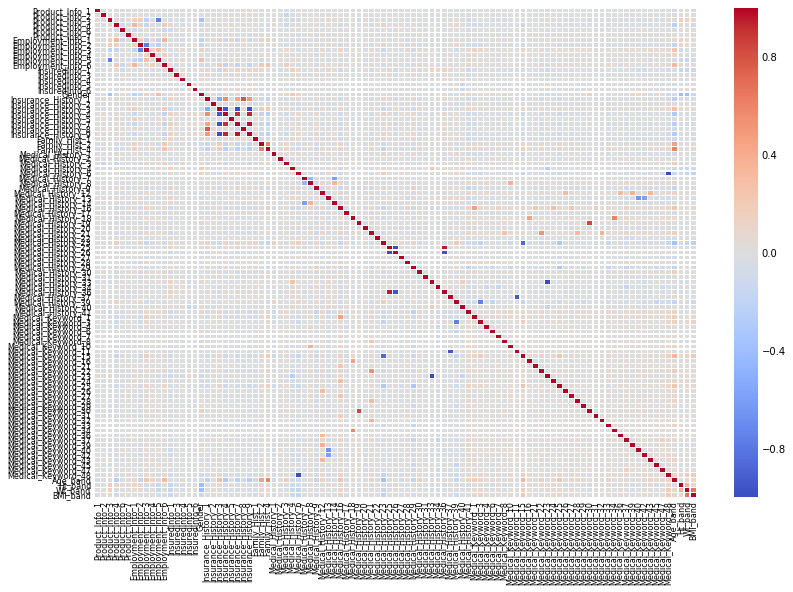

In [46]:
fig, ax = plt.subplots(figsize=(12, 9))
corr = scaled_data.drop('Response', axis=1).corr()
sns.heatmap(corr,cmap='coolwarm',linewidths=0.2, vmin=-1.0, vmax=1.0) 
fig=plt.gcf()
ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)
plt.show()

In [47]:
def top_correlation (df,n):
    corr_matrix = df.corr().abs()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable_1","Variable_2","Correlation"]
    correlation = correlation.reindex(correlation.Correlation.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)

top_correlation(scaled_data,20)

,Variable_1,Variable_2,Correlation
0,Medical_History_6,Medical_Keyword_48,0.993214
1,Medical_History_33,Medical_Keyword_23,0.992977
2,Medical_History_25,Medical_History_26,0.987955
3,Insurance_History_3,Insurance_History_9,0.982519
4,Insurance_History_3,Insurance_History_7,0.974841
5,Medical_History_26,Medical_History_36,0.965353
6,Insurance_History_7,Insurance_History_9,0.962419
7,Medical_History_25,Medical_History_36,0.954161
8,Medical_History_37,Medical_Keyword_11,0.949769
9,Insurance_History_3,Insurance_History_4,0.949392


In [0]:
## Last data cleansing
scaled_data = scaled_data.drop(corr_low.index, axis=1)

# Model Predicting
    1) Running Basic Algorithms
    2) Cross Validation
    3) Ensembling
    4) Important Features Extraction

In [0]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [0]:
train,test=train_test_split(scaled_data,test_size=0.2,random_state=42,stratify=scaled_data['Response'])
train_X= train[train.columns[train.columns!='Response']]
train_Y= train[train.columns[-5]]
test_X = test[test.columns[test.columns!='Response']]
test_Y = test[test.columns[-5]]
Y=scaled_data['Response']
X=scaled_data[scaled_data.columns[scaled_data.columns!='Response']]

### Radial Support Vector Machines (rbf-SVM)

In [51]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
train_prediction1 = model.predict(train_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))
print('The train accuracy of the rbf-SVM is',metrics.accuracy_score(train_prediction1,train_Y))
print(classification_report(prediction1,test_Y))

Accuracy for rbf SVM is  0.4574169992357986
The train accuracy of the rbf-SVM is 0.8158542798913043
              precision    recall  f1-score   support

           1       0.27      0.35      0.30       943
           2       0.17      0.36      0.23       609
           3       0.00      0.00      0.00         2
           4       0.02      0.25      0.04        28
           5       0.23      0.50      0.32       500
           6       0.49      0.32      0.39      3480
           7       0.15      0.40      0.22       593
           8       0.84      0.58      0.68      5622

    accuracy                           0.46     11777
   macro avg       0.27      0.34      0.27     11777
weighted avg       0.59      0.46      0.50     11777



### Linear Support Vector Machine (linear-SVM)

In [52]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
train_prediction2 = model.predict(train_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))
print('The train accuracy of the linear-SVM is',metrics.accuracy_score(train_prediction2,train_Y))
print(classification_report(prediction2,test_Y))

Accuracy for linear SVM is 0.4684554640400781
The train accuracy of the linear-SVM is 0.474800441576087
              precision    recall  f1-score   support

           1       0.26      0.37      0.30       854
           2       0.23      0.31      0.26       951
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.35      0.41      0.38       914
           6       0.46      0.35      0.40      2980
           7       0.18      0.43      0.25       667
           8       0.83      0.59      0.69      5411

    accuracy                           0.47     11777
   macro avg       0.29      0.31      0.29     11777
weighted avg       0.57      0.47      0.51     11777



### Logistic Regression

In [53]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3 = model.predict(test_X)
train_prediction3 = model.predict(train_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
print('The train accuracy of the Logistic Regression is',metrics.accuracy_score(train_prediction3,train_Y))

The accuracy of the Logistic Regression is 0.47236138235543856
The train accuracy of the Logistic Regression is 0.4727199388586957


### Decision Tree

In [54]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4 = model.predict(test_X)
train_prediction4 = model.predict(train_X)

print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))
print('The train accuracy of the Decision Tree is',metrics.accuracy_score(train_prediction4,train_Y))
print(classification_report(prediction4,test_Y))
print('Cross Validation (cv=5) result: ', cross_val_score(model, train_X, train_Y, cv=5).mean())

The accuracy of the Decision Tree is 0.38252526110214824
The train accuracy of the Decision Tree is 1.0
              precision    recall  f1-score   support

           1       0.22      0.22      0.22      1224
           2       0.24      0.25      0.24      1253
           3       0.10      0.09      0.10       227
           4       0.13      0.13      0.13       278
           5       0.38      0.39      0.38      1073
           6       0.32      0.31      0.32      2281
           7       0.26      0.26      0.26      1639
           8       0.60      0.61      0.61      3802

    accuracy                           0.38     11777
   macro avg       0.28      0.28      0.28     11777
weighted avg       0.38      0.38      0.38     11777

Cross Validation (cv=5) result:  0.3727283628682455


### K-Nearest Neighbours(KNN)

In [55]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5 = model.predict(test_X)
train_prediction5 = model.predict(train_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))
print('The train accuracy of the KNN is',metrics.accuracy_score(train_prediction5,train_Y))
print(classification_report(prediction5,test_Y))

The accuracy of the KNN is 0.3852424216693555
The train accuracy of the KNN is 0.5689113451086957
              precision    recall  f1-score   support

           1       0.29      0.25      0.27      1395
           2       0.23      0.25      0.24      1189
           3       0.04      0.11      0.06        75
           4       0.06      0.12      0.08       150
           5       0.17      0.28      0.21       634
           6       0.34      0.30      0.32      2463
           7       0.19      0.24      0.22      1275
           8       0.68      0.57      0.62      4596

    accuracy                           0.39     11777
   macro avg       0.25      0.27      0.25     11777
weighted avg       0.42      0.39      0.40     11777



### Gaussian Naive Bayes

In [56]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
train_prediction6 = model.predict(train_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))
print('The train accuracy of the Gaussian Naive Bayes is',metrics.accuracy_score(train_prediction6,train_Y))
print(classification_report(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.3608728878322153
The train accuracy of the Gaussian Naive Bayes is 0.36336616847826086
              precision    recall  f1-score   support

           1       0.32      0.27      0.29      1430
           2       0.13      0.26      0.18       684
           3       0.06      0.04      0.05       282
           4       0.20      0.05      0.08      1060
           5       0.13      0.18      0.15       805
           6       0.09      0.31      0.14       634
           7       0.22      0.28      0.25      1255
           8       0.76      0.52      0.62      5627

    accuracy                           0.36     11777
   macro avg       0.24      0.24      0.22     11777
weighted avg       0.46      0.36      0.39     11777



### Random Forests

In [57]:
model=RandomForestClassifier(max_depth=10, n_estimators=1000)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
train_prediction7 = model.predict(train_X)
print('The test accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))
print('The train accuracy of the Random Forests is',metrics.accuracy_score(train_prediction7,train_Y))
print(classification_report(prediction7,test_Y))

The test accuracy of the Random Forests is 0.5018255922560924
The train accuracy of the Random Forests is 0.551163383152174
              precision    recall  f1-score   support

           1       0.14      0.52      0.22       339
           2       0.24      0.46      0.31       681
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.53      0.57      0.55       999
           6       0.44      0.38      0.41      2523
           7       0.21      0.43      0.28       795
           8       0.92      0.55      0.69      6440

    accuracy                           0.50     11777
   macro avg       0.31      0.36      0.31     11777
weighted avg       0.67      0.50      0.55     11777



Text(0.5, 1.0, 'Feature Importance by RandomForest Application')

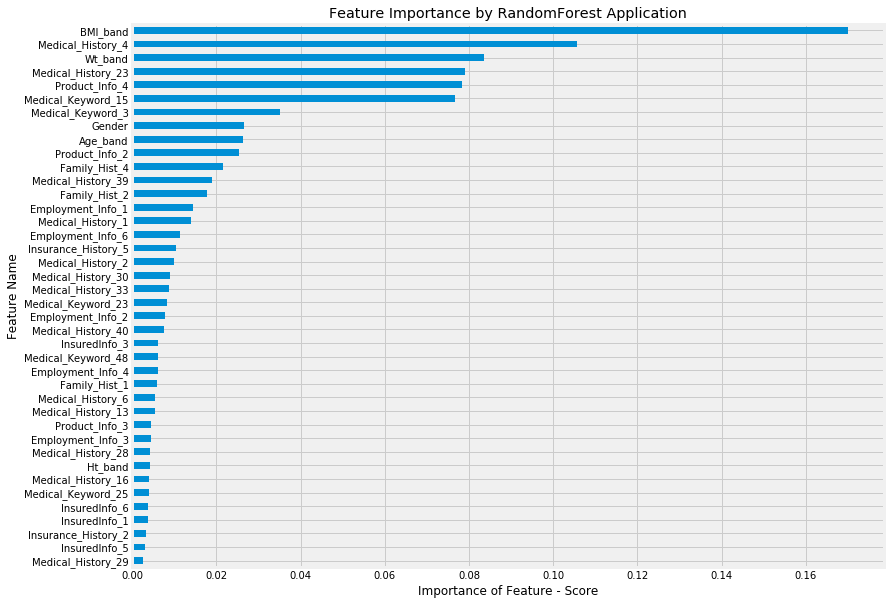

In [58]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()[-40:]
importances.plot(kind='barh', figsize=(12,10))
plt.xlabel('Importance of Feature - Score')
plt.ylabel('Feature Name')
plt.title("Feature Importance by RandomForest Application")

## Cross validation

## Ensemble

In [0]:
from sklearn.ensemble import BaggingClassifier

## Boosting

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.4694553698817619


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

In [0]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

## Grid Search
    Tuning Hyper-Parameter